## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [53]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [54]:
df = pd.read_csv(r"C:\Users\srava\sriharsha_code\End to End Project\bike_sharing_project\notebook\data\bike_sharing_data.csv")

#### Show Top 5 Records

In [55]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [56]:
df['weathersit'] = df['weathersit'].map({1:'Clear to Partly Cloudy', 2:'Misty and Cloudy', 3:'Light Rain or Snow', 4:'Heavy Rain or Snow'})

df['season'] = df['season'].map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})

df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                                9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

df['weekday'] = df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs',5:'Fri', 6:'Sat'})

df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,winter,0,Jan,0,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.81,0.0,16
1,2011-01-01,winter,0,Jan,1,0,Sat,0,Clear to Partly Cloudy,0.22,0.2727,0.80,0.0,40
2,2011-01-01,winter,0,Jan,2,0,Sat,0,Clear to Partly Cloudy,0.22,0.2727,0.80,0.0,32
3,2011-01-01,winter,0,Jan,3,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.75,0.0,13
4,2011-01-01,winter,0,Jan,4,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.75,0.0,1


#### Preparing X and Y variables

In [57]:
X = df.drop(columns=['dteday','cnt'],axis=1)

In [58]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,winter,0,Jan,0,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.81,0.0
1,winter,0,Jan,1,0,Sat,0,Clear to Partly Cloudy,0.22,0.2727,0.80,0.0
2,winter,0,Jan,2,0,Sat,0,Clear to Partly Cloudy,0.22,0.2727,0.80,0.0
3,winter,0,Jan,3,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.75,0.0
4,winter,0,Jan,4,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.75,0.0


In [59]:
y = df['cnt']

In [60]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [61]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [62]:
X = preprocessor.fit_transform(X)

In [63]:
X.shape

(17379, 35)

In [64]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13903, 35), (3476, 35))

#### Create an Evaluate Function to give all metrics after model Training

In [65]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [66]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 140.4302
- Mean Absolute Error: 105.1494
- R2 Score: 0.4060
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 136.8723
- Mean Absolute Error: 103.1233
- R2 Score: 0.4084


Lasso
Model performance for Training set
- Root Mean Squared Error: 140.9401
- Mean Absolute Error: 105.3007
- R2 Score: 0.4017
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 137.4965
- Mean Absolute Error: 103.3657
- R2 Score: 0.4030


Ridge
Model performance for Training set
- Root Mean Squared Error: 140.4034
- Mean Absolute Error: 105.1376
- R2 Score: 0.4063
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 136.8497
- Mean Absolute Error: 103.1460
- R2 Score: 0.4086


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 97.7400
- Mean Absolute Error: 64.9696
- R2 Score: 0.71

### Results

In [67]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.953234
6,XGBRegressor,0.949010
5,Random Forest Regressor,0.945319
4,Decision Tree,0.890053
8,AdaBoost Regressor,0.687813
3,K-Neighbors Regressor,0.558505
2,Ridge,0.408571
0,Linear Regression,0.408375
1,Lasso,0.402967


## Linear Regression

In [68]:
lin_model = XGBRegressor(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.90


c:\Users\srava\sriharsha_code\End to End Project\bike_sharing_project\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:14:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "fit_intercept" } are not used.

  warnings.warn(smsg, UserWarning)


## Plot y_pred and y_test

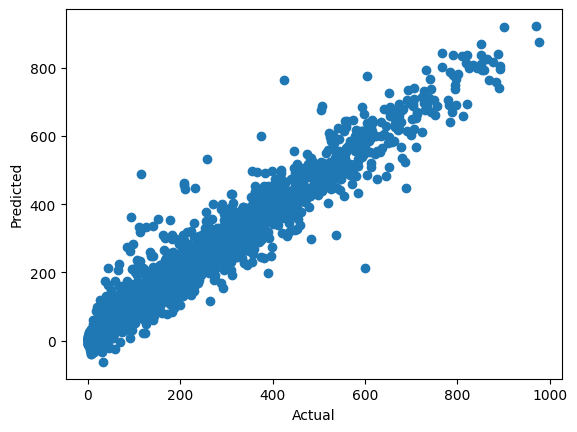

In [69]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

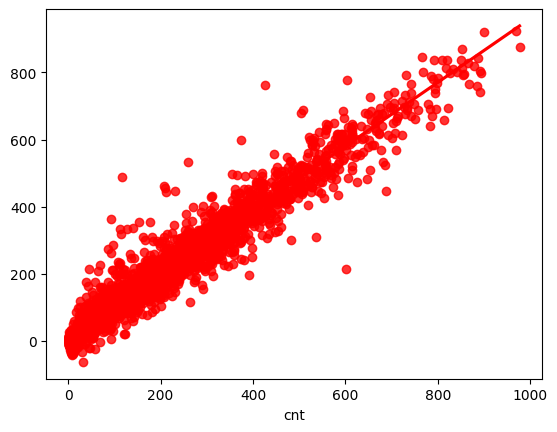

In [70]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [71]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
12830,425,401.879303,23.120697
8688,88,109.092247,-21.092247
7091,4,4.359707,-0.359707
12230,526,511.852936,14.147064
431,13,14.091906,-1.091906
...,...,...,...
6759,17,16.876431,0.123569
13989,85,59.926208,25.073792
173,98,86.810341,11.189659
16192,266,322.870941,-56.870941
